# Visualizing inferred models in Tracts with Demes

## Motivation

In [1]:
import demes
import demesdraw
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Markdown as md
def print_model(file_path):
    with open(file_path) as f:
        lines = f.read()
    return md("```yaml\n" + lines + "```")

## Three populations model

We used the Tracts model [ccx_xxp](../../../analysis-doc/210619-TRACTS-ccx_xxp/) to infer the following parameters, from the tracts length distribution.

- _**frac1**_: rate of EUR arriving to the MXL per generation?.
- _**frac2**_: rate of EUR arriving to the MXL per generation?.
- **_t1_**: Time (generations ago) of initial admixture event (IBS and MXB).
- **_frac3_**: rate of AFR arriving to the MXL at the Afr pulse.
- **_t2_**: Time of Afr pulse.

The estimated paramaters are shown next in the same order as the list above:

In [2]:
# estimated model parameters
!cat ../../../analysis-doc/210619-TRACTS-ccx_xxp/results/boot0_-295.79_pars

0.05335903311241576	0.05534173741472544	0.15363486148356473	0.09130043386199158	0.11673092528754962


In [3]:
# these parameters are encoded in the following migration matrix
mig_mat = np.loadtxt("../../../analysis-doc/210619-TRACTS-ccx_xxp/results/boot0_-295.79_mig")
print(mig_mat.round(3))

[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.03 ]
 [0.053 0.055 0.063]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.491 0.509 0.   ]]


## Specifying the model with Demes

Next, I encoded these parameters in the demes model specification.

In [4]:
mdl_yml = "./mx-admx-3pops.yaml"
mx_admx = demes.load(mdl_yml)
print_model(mdl_yml)

```yaml
# this is a comment
description:
    Model for admixture in Mexico, this model was estimated with
    tracts using a ccx_xxp model.
time_units: generations
generation_time: 29
demes:
- name: YRI
  description: Yoruba in Ibadan, Nigeria
  epochs:
  - start_size: 50000
    end_time: 0
- name: IBS
  description: Iberian populations in Spain (IBS).
  epochs:
  - start_size: 50000
    end_time: 0
- name: MXB
  description: Native American population in Mexico.
  epochs:
  - start_size: 20000
    end_time: 0
- name: MXL
  description: Admixed population in Mexico
  ancestors: [IBS, MXB]
  proportions: [0.4908, 0.5092]  # Obtained from Tracts
  start_time: 15
  epochs:
  - end_time: 0
    start_size: 20000
    end_size: 50000
migrations:
  - source: IBS
    dest: MXL
    rate: 0.053
  - source: MXB
    dest: MXL
    rate: 0.055
pulses:
  - source: YRI
    dest: MXL
    proportion: 0.063
    time: 11
  - source: YRI
    dest: MXL
    proportion: 0.0298
    time: 10


```

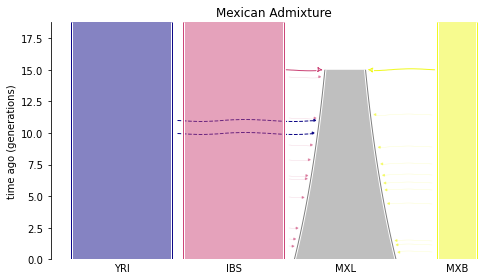

In [5]:
colors = {
    'MXB': '#f0f921ff',
    'IBS': '#cc4678ff',
    'YRI': '#0d0887ff',

}
demesdraw.tubes(mx_admx, colours=colors,title="Mexican Admixture")
plt.savefig("adm.pdf")
plt.show();

***

## Four populations model

We used the Tracts model [ccx_xxp](../../../analysis-doc/210619-TRACTS-ccx_xxp/) to infer the following parameters, from the tracts length distribution.

- _**frac1**_: rate of EUR arriving to the MXL per generation?.
- _**frac2**_: rate of EUR arriving to the MXL per generation?.
- **_t1_**: Time (generations ago) of initial admixture event (IBS and MXB).
- **_frac3_**: rate of AFR arriving to the MXL at the Afr pulse.
- **_t2_**: Time of Afr pulse.

The estimated paramaters are shown next in the same order as the list above:

In [6]:
# these parameters are encoded in the following migration matrix
mig_mat = np.loadtxt("../../../analysis-doc/210624-TRACTS-4-populations/results/ppxx_ccxx_xxpp/boot0_-342.81_mig")
print(mig_mat.round(3))

[[0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.046 0.003]
 [0.058 0.046 0.042 0.002]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.058 0.046 0.    0.   ]
 [0.201 0.799 0.    0.   ]]


In [7]:
mdl_yml = "./mx-admx-4pops.yaml"
mx_admx = demes.load(mdl_yml)
print_model(mdl_yml)

/Users/santiagomedina/opt/miniconda3/envs/demography/lib/python3.9/site-packages/demes/demes.py:1611: UserWarning: Multiple pulses are defined for the same deme(s) at time 11. The ancestry proportions after this time will thus depend on the order in which the pulses have been specified. To avoid unexpected behaviour, the graph can instead be structured to introduce a new deme at this time with the desired ancestry proportions.
  warnings.warn(
/Users/santiagomedina/opt/miniconda3/envs/demography/lib/python3.9/site-packages/demes/demes.py:1611: UserWarning: Multiple pulses are defined for the same deme(s) at time 10. The ancestry proportions after this time will thus depend on the order in which the pulses have been specified. To avoid unexpected behaviour, the graph can instead be structured to introduce a new deme at this time with the desired ancestry proportions.
  warnings.warn(


```yaml
# this is a comment
description:
    Model for admixture in Mexico, this model was estimated with
    tracts using a ccx_xxp model.
time_units: generations
generation_time: 29
demes:
- name: YRI
  description: Yoruba in Ibadan, Nigeria
  epochs:
  - start_size: 50000
    end_time: 0
- name: IBS
  description: Iberian populations in Spain (IBS).
  epochs:
  - start_size: 50000
    end_time: 0
- name: CHB
  description: Han Chinese in Beijing, China
  epochs:
  - start_size: 50000
    end_time: 0
- name: MXB
  description: Native American population in Mexico.
  epochs:
  - start_size: 20000
    end_time: 0
- name: MXL
  description: Admixed population in Mexico
  ancestors: [IBS, MXB]
  proportions: [0.201, 0.799]  # Obtained from Tracts
  start_time: 16
  epochs:
  - end_time: 0
    start_size: 20000
    end_size: 50000
migrations:
  - source: IBS
    dest: MXL
    rate: 0.058
  - source: MXB
    dest: MXL
    rate: 0.046
pulses:
  - source: YRI
    dest: MXL
    proportion: 0.042
    time: 11
  - source: YRI
    dest: MXL
    proportion: 0.046
    time: 10
  - source: CHB
    dest: MXL
    proportion: 0.002
    time: 11
  - source: CHB
    dest: MXL
    proportion: 0.003
    time: 10

```

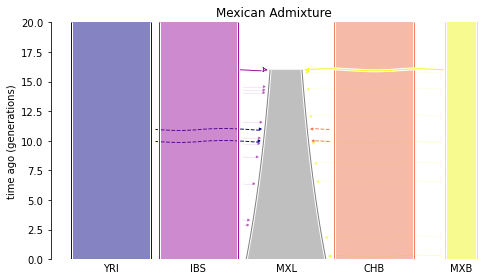

In [8]:
colors = {
    'MXB': '#f0f921ff',
    'IBS': '#9c179eff',
    'YRI': '#0d0887ff',
    'CHB': '#ed7953e6'

}
demesdraw.tubes(mx_admx, colours=colors,title="Mexican Admixture")
plt.savefig("adm.pdf")
plt.show();